In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

In [2]:
# Bringing in the NBA players dataset

In [3]:
nba_data = pd.read_csv('./nba_data/Seasons_Stats.csv')

In [4]:
kobe_data_from_nba = nba_data[nba_data.Player == 'Kobe Bryant']
lebron_data_from_nba = nba_data[nba_data.Player == 'LeBron James']

In [5]:
kobe_data_from_nba.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12900,12900,1997.0,Kobe Bryant,SG,18.0,LAL,71.0,6.0,1103.0,14.4,...,0.819,47.0,85.0,132.0,91.0,49.0,23.0,112.0,102.0,539.0
13479,13479,1998.0,Kobe Bryant,SG,19.0,LAL,79.0,1.0,2056.0,18.5,...,0.794,79.0,163.0,242.0,199.0,74.0,40.0,157.0,180.0,1220.0
14021,14021,1999.0,Kobe Bryant,SG,20.0,LAL,50.0,50.0,1896.0,18.9,...,0.839,53.0,211.0,264.0,190.0,72.0,50.0,157.0,153.0,996.0
14537,14537,2000.0,Kobe Bryant,SG,21.0,LAL,66.0,62.0,2524.0,21.7,...,0.821,108.0,308.0,416.0,323.0,106.0,62.0,182.0,220.0,1485.0
15028,15028,2001.0,Kobe Bryant,SG,22.0,LAL,68.0,68.0,2783.0,24.5,...,0.853,104.0,295.0,399.0,338.0,114.0,43.0,220.0,222.0,1938.0


In [6]:
import matplotlib.pyplot as plt

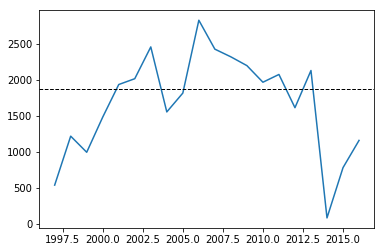

In [7]:
plt.plot(kobe_data_from_nba['Year'], kobe_data_from_nba['PTS'])
plt.axhline(kobe_data_from_nba['PTS'].median(), color='k', linestyle='dashed', linewidth=1)
plt.show() 

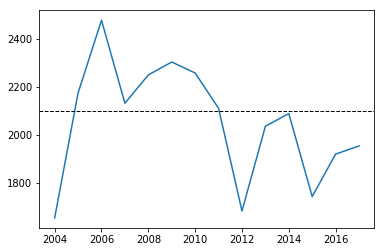

In [8]:
plt.plot(lebron_data_from_nba['Year'], lebron_data_from_nba['PTS'])
plt.axhline(lebron_data_from_nba['PTS'].median(), color='k', linestyle='dashed', linewidth=1)
plt.show() 

In [9]:
kobe_data = pd.read_csv('kobe_bryant_2016.csv')

In [10]:
kobe_data.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,28-10-2015,37-066,LAL,NaN,MIN,L (-1),1,28:56:00,...,4.0,4.0,1.0,2.0,0.0,0.0,1.0,24.0,13.9,-6.0
1,2,2.0,30-10-2015,37-068,LAL,@,SAC,L (-18),1,22:12,...,2.0,4.0,3.0,0.0,0.0,3.0,2.0,13.0,6.5,-18.0
2,3,3.0,01-11-2015,37-070,LAL,NaN,DAL,L (-10),1,31:21:00,...,3.0,5.0,1.0,0.0,0.0,1.0,5.0,15.0,5.7,-2.0
3,4,4.0,03-11-2015,37-072,LAL,NaN,DEN,L (-11),1,29:10:00,...,1.0,2.0,5.0,2.0,0.0,1.0,5.0,11.0,8.0,-4.0
4,5,5.0,06-11-2015,37-075,LAL,@,BRK,W (+6),1,31:02:00,...,3.0,3.0,3.0,0.0,0.0,3.0,3.0,18.0,7.2,-6.0


In [11]:
class TweetSentiment():
    def __init__(self, file_name, until_date):
        self.file_name = file_name
        self.until_date = until_date
        
    @staticmethod
    def sentiment_analysis(tweet):
        analysis = TextBlob(tweet)
        return analysis.sentiment[0]
    
    @staticmethod
    def clean_data(df):
        df.dropna(subset=['text'], inplace=True)
        df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M')
        df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
        df['text'] = df['text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x).split()))
        df.drop_duplicates(subset = "text", keep = False, inplace = True)
        return df

    @staticmethod
    def calculating_score(df):
        df['analysis_score'] = df['text'].apply(TweetSentiment.sentiment_analysis)
        return df
    
    def _calculate_sentiment(self):
        self.df = pd.read_csv('./nba_data/{0}.csv'.format(self.file_name))
        # Cleaning the data
        self.df = TweetSentiment.clean_data(self.df)
        # Getting all the required values
        self.df = self.df[(self.df['created_at'] < self.until_date) & (self.df['created_at'] > self.until_date - timedelta(5))]
        # Calculating score
        self.df = TweetSentiment.calculating_score(self.df)
        return self.df['analysis_score'].mean()
            

In [12]:
def calculate_sentiment(date):
    try:
        tweet_obj = TweetSentiment('kobe_tweets', datetime.strptime(date,'%d-%m-%Y'))
        sentiment = tweet_obj._calculate_sentiment()
        return sentiment
    except Exception as exc:
        return 0.00


In [13]:
kobe_data['sentiment_score'] = kobe_data['Date'].apply(calculate_sentiment)

In [14]:
kobe_data.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,sentiment_score
0,1,1.0,28-10-2015,37-066,LAL,NaN,MIN,L (-1),1,28:56:00,...,4.0,1.0,2.0,0.0,0.0,1.0,24.0,13.9,-6.0,0.230
1,2,2.0,30-10-2015,37-068,LAL,@,SAC,L (-18),1,22:12,...,4.0,3.0,0.0,0.0,3.0,2.0,13.0,6.5,-18.0,0.230
2,3,3.0,01-11-2015,37-070,LAL,NaN,DAL,L (-10),1,31:21:00,...,5.0,1.0,0.0,0.0,1.0,5.0,15.0,5.7,-2.0,0.575
3,4,4.0,03-11-2015,37-072,LAL,NaN,DEN,L (-11),1,29:10:00,...,2.0,5.0,2.0,0.0,1.0,5.0,11.0,8.0,-4.0,NaN
4,5,5.0,06-11-2015,37-075,LAL,@,BRK,W (+6),1,31:02:00,...,3.0,3.0,0.0,0.0,3.0,3.0,18.0,7.2,-6.0,0.150


In [15]:
kobe_data.dropna(subset=['sentiment_score'], inplace=True)

In [17]:
kobe_data_required = kobe_data[['sentiment_score', '+/-', 'PTS', 'FG%', 'AST', 'TOV']]
kobe_data_required.rename(columns = {
                                '+/-': 'Per-100-possession',
                                'PTS': 'Points',
                                'FG%': 'Field Goal %',
                                'AST': 'Assists',
                                'TOV': 'Turnovers'
                            },\
                          inplace=True)
kobe_data_required.dropna(subset=['Points'], inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [18]:
kobe_data_required.head()

,sentiment_score,Per-100-possession,Points,Field Goal %,Assists,Turnovers
0,0.230,-6.0,24.0,0.333,1.0,0.0
1,0.230,-18.0,13.0,0.417,3.0,3.0
2,0.575,-2.0,15.0,0.200,1.0,1.0
4,0.150,-6.0,18.0,0.313,3.0,3.0
5,0.150,-1.0,18.0,0.316,3.0,1.0


In [20]:
import seaborn as sns
    
def display_correlation(data):
    # calculate the correlation matrix
    corr = data.corr()
 
    # plot the heatmap
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

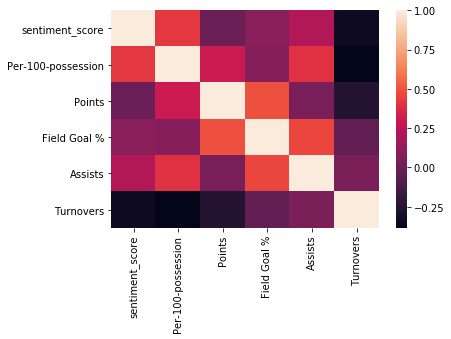

In [21]:
display_correlation(kobe_data_required)

In [22]:
lebron_data = pd.read_csv('lebron_james_2014.csv')

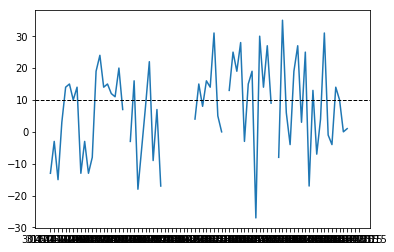

In [24]:
plt.plot(lebron_data['Date'], lebron_data['+/-'])
plt.axhline(lebron_data['+/-'].median(), color='k', linestyle='dashed', linewidth=1)
plt.show() 

In [23]:
lebron_data.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,30-10-2014,29-304,CLE,NaN,NYK,L (-5),1,43:14:00,...,5.0,5.0,4.0,0.0,0.0,8.0,3.0,17.0,3.2,-13.0
1,2,2.0,31-10-2014,29-305,CLE,@,CHI,W (+6),1,41:40:00,...,7.0,8.0,5.0,4.0,1.0,3.0,1.0,36.0,27.4,-3.0
2,3,3.0,04-11-2014,29-309,CLE,@,POR,L (-19),1,34:56:00,...,6.0,7.0,7.0,1.0,0.0,3.0,2.0,11.0,8.8,-15.0
3,4,4.0,05-11-2014,29-310,CLE,@,UTA,L (-2),1,42:02:00,...,3.0,3.0,4.0,3.0,0.0,4.0,2.0,31.0,23.5,3.0
4,5,5.0,07-11-2014,29-312,CLE,@,DEN,W (+9),1,39:38:00,...,7.0,7.0,11.0,1.0,1.0,3.0,1.0,22.0,20.3,14.0


In [25]:
lebron_data['sentiment_score'] = lebron_data['Date'].apply(calculate_sentiment)

In [26]:
lebron_data.dropna(subset=['sentiment_score'], inplace=True)

In [27]:
lebron_data.drop(['Rk','G','Age','GS'], inplace=True, axis=1)

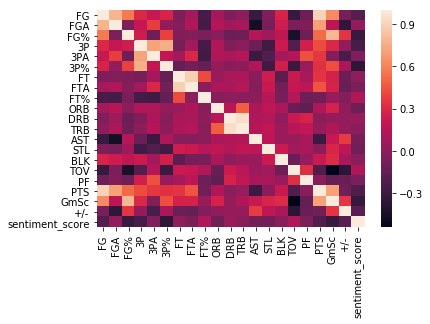

In [28]:
display_correlation(lebron_data)

In [29]:
lebron_data_required = lebron_data[['sentiment_score', '+/-', 'PTS', 'FG%', 'AST', 'TOV']]
lebron_data_required.rename(columns = {
                                '+/-': 'Per-100-possession',
                                'PTS': 'Points',
                                'FG%': 'Field Goal %',
                                'AST': 'Assists',
                                'TOV': 'Turnovers'
                            },\
                          inplace=True)
lebron_data_required.dropna(subset=['Points'], inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
lebron_data_required.head()

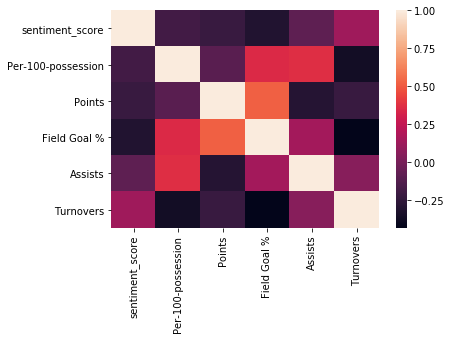

In [30]:
display_correlation(lebron_data_required)

In [ ]:
corr = lebron_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(lebron_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(lebron_data.columns)
ax.set_yticklabels(lebron_data.columns)
plt.show()